

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>


# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt



## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
- não existe valores ausentes
- os tipos de dados estão corretos
- verificar se existe valores duplicados






## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
#verificar se tem dados duplicados na tabela plans

df_plans_duplicated = df_plans[df_plans.duplicated()]
print(df_plans_duplicated)

Empty DataFrame
Columns: [messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute, plan_name]
Index: []


- não existe linhas duplicadas

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

- como só existe dois planos, não acho necessário adicionar mais dados

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com o df de planos!
</div>



## Usuários

In [6]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprima uma amostra de dados dos usuários

print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
- existe valores ausentes na coluna churn_date
- como os dados ausentes significam, teoricamente, que o usuário ainda está usando o plano, não tem necessidade de preencher esses valores ausentes
- o que pode ser feito, é substituir o valor Nan por um valor mais específico, como used
- os tipos de dados estão corretos
- verificar se existe valores duplicados


### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [8]:
#verificar se tem dados duplicados na tabela users

df_users_duplicated = df_users[df_users.duplicated()]
print(df_users_duplicated)

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


- não existe valores duplicados

In [9]:
#linhas com valores na coluna 
df_users_churn = df_users[~df_users['churn_date'].isna()]
print(df_users_churn[['user_id', 'reg_date', 'churn_date']])

     user_id    reg_date  churn_date
6       1006  2018-11-27  2018-12-18
12      1012  2018-06-28  2018-11-16
22      1022  2018-04-20  2018-09-07
40      1040  2018-12-23  2018-12-30
50      1050  2018-03-20  2018-10-07
54      1054  2018-04-21  2018-12-31
67      1067  2018-09-24  2018-11-24
83      1083  2018-10-26  2018-12-18
84      1084  2018-06-04  2018-11-11
94      1094  2018-10-30  2018-12-12
106     1106  2018-05-10  2018-11-14
129     1129  2018-11-10  2018-12-27
172     1172  2018-03-30  2018-11-29
180     1180  2018-12-01  2018-12-22
186     1186  2018-12-22  2018-12-31
191     1191  2018-01-21  2018-11-30
220     1220  2018-04-22  2018-10-13
246     1246  2018-01-09  2018-07-31
269     1269  2018-09-13  2018-12-15
281     1281  2018-07-23  2018-11-14
296     1296  2018-10-20  2018-12-18
298     1298  2018-09-21  2018-12-19
300     1300  2018-10-21  2018-12-19
315     1315  2018-04-26  2018-10-03
358     1358  2018-04-26  2018-10-22
363     1363  2018-01-05  2018-08-16
4

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

- como esse são os dados mais básicos, em que os dados são apenas dados pessoais, não acredito que é necessário adicionar dados

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

PErfeito o trabalho e a interpretação dos dados de usuários!
</div>



## Chamadas

In [10]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprima uma amostra de dados das chamadas

print(df_calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
- não existe valores ausentes
- verificar se existe valores duplicados
- já olhando para as outras colunas, é possivel perceber que existe uma coluna de nome id que está em mais de uma coluna, porém os dados são diferentes
- então, seria interessante mudar o nome da coluna, para não ficar confuso e evitar erros
- mudar o tipo de dado da coluna call_date de string para datetime


### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [12]:
#verificar se tem dados duplicados na tabela calls

df_calls_duplicated = df_calls[df_calls.duplicated()]
print(df_calls_duplicated)

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


- não existe valores duplicados

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [13]:
#substituir o nome da coluna id

df_calls = df_calls.rename(columns={'id' : 'id_calls'})

print(df_calls.head())

   id_calls  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [14]:
#mudar o tipo de dado da coluna
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeita a percepção e execução com o df de chamadas
</div>



## Mensagens

In [15]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprima uma amostra dos dados das mensagens

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
- não existe valores ausentes
- verificar se existe valores duplicados
- já olhando para as outras colunas, é possivel perceber que existe uma coluna de nome id que está em mais de uma coluna, porém os dados são diferentes
- então, seria interessante mudar o nome da coluna, para não ficar confuso e evitar erros
- mudar o tipo de dado da coluna message_date de string para datetime

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [17]:
#verificar se tem dados duplicados na tabela messages

df_messages_duplicated = df_messages[df_messages.duplicated()]
print(df_messages_duplicated)

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


- não existe valores duplicados

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [18]:
#substituir o nome da coluna id

df_messages = df_messages.rename(columns={'id' : 'id_messages'})

print(df_messages.head())

  id_messages  user_id message_date
0    1000_125     1000   2018-12-27
1    1000_160     1000   2018-12-31
2    1000_223     1000   2018-12-31
3    1000_251     1000   2018-12-27
4    1000_255     1000   2018-12-26


In [19]:
#mudar o tipo de dado da coluna
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo certo com o df de mensagens!
</div>



## Internet

In [20]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#  Imprima uma amostra de dados para o tráfego da internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
- não existe valores ausentes
- verificar se existe valores duplicados
- já olhando para as outras colunas, é possivel perceber que existe uma coluna de nome id que está em mais de uma coluna, porém os dados são diferentes
- então, seria interessante mudar o nome da coluna, para não ficar confuso e evitar erros
- mudar o tipo de dado da coluna session_date de string para datetime

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [22]:
#verificar se tem dados duplicados na tabela internet

df_internet_duplicated = df_internet[df_internet.duplicated()]
print(df_internet_duplicated)

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


- não existe valores ausentes

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [23]:
#substituir o nome da coluna id

df_internet = df_internet.rename(columns={'id' : 'id_internet'})

print(df_internet.head())

  id_internet  user_id session_date  mb_used
0     1000_13     1000   2018-12-29    89.86
1    1000_204     1000   2018-12-31     0.00
2    1000_379     1000   2018-12-28   660.40
3    1000_413     1000   2018-12-26   270.99
4    1000_442     1000   2018-12-27   880.22


In [24]:
#mudar o tipo de dado da coluna
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
    
Parabéns pela clareza em cada passo!
</div>



## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [25]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


- um plano mais barato tem menos minutos mensais, menos mensagens e menos GB de dados
- após exceder os limites do pacote, quanto mais barato, mais caro fica o minuto, mais caro fica a mensagem e mais caro fica por GB de dados

## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [26]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

df_calls['month'] = df_calls['call_date'].dt.to_period('M')

calls_month = df_calls.groupby(['user_id', 'month']).size().reset_index()

calls_month = calls_month.rename(columns={0: 'num_calls'})

print(calls_month)

      user_id    month  num_calls
0        1000  2018-12         16
1        1001  2018-08         27
2        1001  2018-09         49
3        1001  2018-10         65
4        1001  2018-11         64
...       ...      ...        ...
2253     1498  2018-12         39
2254     1499  2018-09         41
2255     1499  2018-10         53
2256     1499  2018-11         45
2257     1499  2018-12         65

[2258 rows x 3 columns]


In [27]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

calls_minute = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

total_minute = calls_minute['duration'].sum()

print(calls_minute)
print('total minute:', total_minute)

      user_id    month  duration
0        1000  2018-12    116.83
1        1001  2018-08    171.14
2        1001  2018-09    297.69
3        1001  2018-10    374.11
4        1001  2018-11    404.59
...       ...      ...       ...
2253     1498  2018-12    324.77
2254     1499  2018-09    330.37
2255     1499  2018-10    363.28
2256     1499  2018-11    288.56
2257     1499  2018-12    468.10

[2258 rows x 3 columns]
total minute: 929150.26


In [28]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
df_messages['month'] = df_messages['message_date'].dt.to_period('M')

message_month = df_messages.groupby(['user_id', 'month']).size().reset_index()

message_month = message_month.rename(columns={0: 'num_message'})

total_message = message_month['num_message'].sum()

print(message_month)

print('total message:', total_message)

      user_id    month  num_message
0        1000  2018-12           11
1        1001  2018-08           30
2        1001  2018-09           44
3        1001  2018-10           53
4        1001  2018-11           36
...       ...      ...          ...
1801     1496  2018-09           21
1802     1496  2018-10           18
1803     1496  2018-11           13
1804     1496  2018-12           11
1805     1497  2018-12           50

[1806 rows x 3 columns]
total message: 76051


In [47]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
df_internet['month'] = df_internet['session_date'].dt.to_period('M')

internet_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

internet_month = internet_month.rename(columns={'mb_used': 'num_internet'})

total_internet = internet_month['num_internet'].sum()

print(internet_month)

print('total internet:', total_internet)



      user_id    month  num_internet
0        1000  2018-12       1901.47
1        1001  2018-08       6919.15
2        1001  2018-09      13314.82
3        1001  2018-10      22330.49
4        1001  2018-11      18504.30
...       ...      ...           ...
2272     1498  2018-12      23137.69
2273     1499  2018-09      12984.76
2274     1499  2018-10      19492.43
2275     1499  2018-11      16813.83
2276     1499  2018-12      22059.21

[2277 rows x 3 columns]
total internet: 38440763.70999999


[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Correta a escolha de agregar por usuário + mês!
</div>



In [48]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
merged_data = calls_month.merge(calls_minute, on=['user_id', 'month'], how='outer')

# Junte os dados de mensagens com base em 'user_id' e 'month'
merged_data = merged_data.merge(message_month, on=['user_id', 'month'], how='outer')

# Junte os dados de internet com base em 'user_id' e 'month'
merged_data = merged_data.merge(internet_month, on=['user_id', 'month'], how='outer')

merged_data = merged_data.merge(df_users[['user_id', 'plan']], on='user_id')

merged_data = merged_data.merge(df_plans.rename(columns={'plan_name': 'plan'}), on='plan')

print(merged_data)

      user_id    month  num_calls  duration  num_message  num_internet  \
0        1000  2018-12       16.0    116.83         11.0       1901.47   
1        1006  2018-11        2.0      9.32         15.0       2068.37   
2        1006  2018-12        9.0     54.79        139.0      32118.82   
3        1008  2018-10       71.0    450.21         21.0      17106.99   
4        1008  2018-11       63.0    422.81         37.0      23676.72   
...       ...      ...        ...       ...          ...           ...   
2288     1194  2018-11        NaN       NaN         62.0      42866.10   
2289     1194  2018-12        NaN       NaN         56.0      31088.49   
2290     1349  2018-10        NaN       NaN         76.0      13093.55   
2291     1349  2018-11        NaN       NaN         72.0      17128.26   
2292     1349  2018-12        NaN       NaN         61.0      13039.91   

          plan  messages_included  mb_per_month_included  minutes_included  \
0     ultimate               1000

In [31]:
# Adicione as informações sobre o plano




[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Os dados devem ser unidos por meio de um outer join.
    
Pense que eventualmente um cliente pode não ter feito um dos tipos de operação no mês, mas ainda assim deve ter esse mês registrado com um 0 para aquele tipo de operação e o left join poderia comprometer esse registro.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Esse ponto aqui que permanece pendente é talvez o mais importante do notebook todo, vale a pena abordá-lo com o tutor, ok?
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Valeu pelo ajuste!
</div>

In [52]:
# Calcule a receita mensal para cada usuário
def receita_mensal(row):
    minutes = row['minutes_included']
    messages = row['messages_included']
    internet = row['mb_per_month_included']
    usd_month_minutes = row['usd_per_minute']
    usd_month_messages = row['usd_per_message']
    usd_month_internet = row['usd_per_gb']
    
    if row['duration'] > minutes:
        total_minutes = row['duration'] - minutes
    else:
        total_minutes = 0
            
    if row['num_message'] > messages:
        total_message = row['num_message'] - messages
    else:
        total_message = 0
        
    if row['num_internet'] > internet:
        total_internet = row['num_internet'] - internet
    else:
        total_internet = 0
        
    receita_minute = total_minutes *  usd_month_minutes
    receita_message = total_message * usd_month_messages
    receita_internet = mt.ceil(total_internet / 1024) * usd_month_internet
    
    if row['plan'] == 'surf':
        custo_fixo = 20
    else:
        custo_fixo = 70
        
    receita_mensal = receita_minute + receita_message + receita_internet + custo_fixo
    return receita_mensal
        

merged_data['receita'] = merged_data.apply(receita_mensal, axis=1)

print(merged_data)


      user_id    month  num_calls  duration  num_message  num_internet  \
0        1000  2018-12       16.0    116.83         11.0       1901.47   
1        1006  2018-11        2.0      9.32         15.0       2068.37   
2        1006  2018-12        9.0     54.79        139.0      32118.82   
3        1008  2018-10       71.0    450.21         21.0      17106.99   
4        1008  2018-11       63.0    422.81         37.0      23676.72   
...       ...      ...        ...       ...          ...           ...   
2288     1194  2018-11        NaN       NaN         62.0      42866.10   
2289     1194  2018-12        NaN       NaN         56.0      31088.49   
2290     1349  2018-10        NaN       NaN         76.0      13093.55   
2291     1349  2018-11        NaN       NaN         72.0      17128.26   
2292     1349  2018-12        NaN       NaN         61.0      13039.91   

          plan  messages_included  mb_per_month_included  minutes_included  \
0     ultimate               1000

- esse item eu já fiz junto com o tutor
- ele ainda está errado?
- precisa de mais ajuste?

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

A sua função considerar o duration do df que contém todos os gastos do cliente e, sabendo o plano que ele possui, transformar essa duração em gasto por parte do cliente em $
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Esse ponto aqui que permanece pendente e é bem chatinho na verdade... Como vai falar com o tutor vale a pena gastar um tempo aqui! Tenho certeza que com uma explicação detalhada vai sair certinho!
</div>


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

plan      month  
surf      2018-01    1266.000000
          2018-02    1298.964481
          2018-03    1262.875468
          2018-04    1263.106383
          2018-05    1247.573793
          2018-06    1247.910383
          2018-07    1244.090290
          2018-08    1240.206434
          2018-09    1242.784263
          2018-10    1243.914913
          2018-11    1244.997310
          2018-12    1242.103920
ultimate  2018-01    1149.919643
          2018-02    1173.948529
          2018-03    1189.436594
          2018-04    1193.411824
          2018-05    1205.012575
          2018-06    1236.260604
          2018-07    1246.292232
          2018-08    1257.063306
          2018-09    1272.446476
          2018-10    1255.661441
          2018-11    1265.072980
          2018-12    1263.910204
Name: user_id, dtype: float64


[]

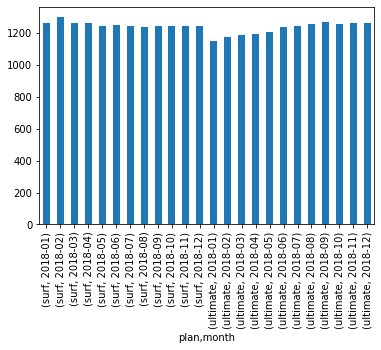

In [33]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
df_mean = df_calls.merge(df_users, on='user_id')
df_mean = df_mean.groupby(by=['plan', 'month'])['user_id'].mean()
print(df_mean)
df_mean.plot(kind='bar',);
plt.plot()

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

A direção está certa, mas a análise deve ser feita mês a mês.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Vale a pena passar com o tutor para:
    
- Incluir os diferentes planos lado a lado para facilitar a comparação
- Aqui a duração média deve ser por usuário ao mês, não por ligação.
</div>


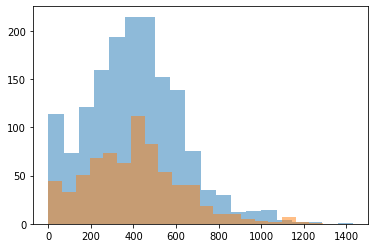

In [34]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
grouped_data = merged_data.groupby(['month', 'user_id', 'plan']).sum().reset_index()

# Plotando histograma
for plan in grouped_data['plan'].unique():
    plan_data = grouped_data[grouped_data['plan'] == plan]
    plt.hist(plan_data['duration'], bins=20, alpha=0.5, label=plan)


plt.show()



- não estou conseguindo preencher o gráfico

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Aqui como foi pedido o histograma, devemos construir um para cada plano (ou um com as curvas sobrepostas para ambos os planos) a partir do df merged_data (ou calls_month), focando na coluna duration.
    
Não iremos ver as diferenças mês a mês, mas os dados já estão com a granularidade solicitada.
</div>



merged_data

<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

A coluna que deve ser aplicada o .hist() é a coluna que possui odos os usuários e seus tempos gastos em ligações mensalmente (ou seja, devemos ter uma linha por cliente e por mês) ,você está passando acima o df contendo as características dos planos.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Valeu pelo ajuste!
</div>

[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

In [35]:
# Calcule a média e a variação da duração mensal das chamadas

media_mensal = calls_month.groupby('month').mean()


variancia_mensal = calls_month.groupby('month').var()

print(media_mensal['num_calls'])
print(variancia_mensal['num_calls'])



month
2018-01    28.666667
2018-02    51.600000
2018-03    46.285714
2018-04    48.478873
2018-05    57.298077
2018-06    58.304965
2018-07    62.039106
2018-08    59.086957
2018-09    59.649819
2018-10    62.504451
2018-11    61.168734
2018-12    66.552174
Freq: M, Name: num_calls, dtype: float64
month
2018-01     247.866667
2018-02    1043.400000
2018-03     903.798319
2018-04     822.538833
2018-05    1022.560773
2018-06     773.742047
2018-07    1205.195091
2018-08    1021.110309
2018-09     921.431277
2018-10     968.828105
2018-11     964.618224
2018-12    1087.494004
Freq: M, Name: num_calls, dtype: float64


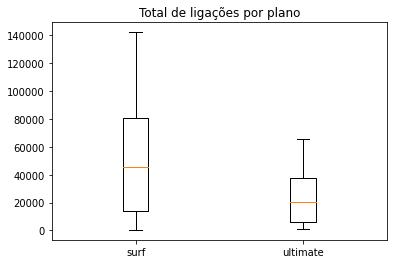

In [36]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

monthly_plan_totals = grouped_data.groupby(['month', 'plan']).sum().reset_index()

data_dict = {}

for plan in monthly_plan_totals['plan'].unique():
    data_dict[plan] = monthly_plan_totals[monthly_plan_totals['plan'] == plan]['duration']


plt.boxplot(data_dict.values(), labels=data_dict.keys())

plt.title('Total de ligações por plano') 

plt.show()



[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]
- tanto a média como a variância possuem um variação pequena entre os meses
- não consegui fazer um gráfico para cada mês


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

O solicitado foi avaliar a variabilidade mensal em ligações. Dessa forma utilize o df calls_month, que já possui a agregação mensal e estude média, desvio padrão e o boxplot.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Improtante usar títilos nas visualizações e que elas contemplem amos os planos em barras (ou caixas no caso) diferentes.
    
Não é necessário fazer um gráfico por mês, mas mais uma vez vale utilizar o total de ligações por mês e por cliente. Dessa forma poderemos diferenciar o comportamento observado em cada um dos planos.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Valeu pelo ajuste!
</div>

### Mensagens

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

As dicas da sessão de ligação se aplicam também para as sessões de mensagens e internet.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

As dicas da sessão de ligação continuam se aplicando também para as sessões de mensagens e internet.
</div>

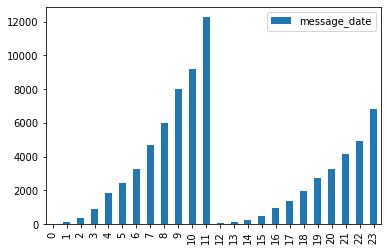

In [37]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

media_messages = df_messages.merge(df_users, on='user_id')

media_messages = media_messages.groupby(['plan', 'month'])['message_date'].count().reset_index()

media_messages.plot(kind='bar')

plt.show()



month    plan    
2018-01  surf           30
         ultimate       66
2018-02  surf          308
         ultimate      296
2018-03  surf          819
         ultimate      517
2018-04  surf         1661
         ultimate      897
2018-05  surf         2988
         ultimate     1300
2018-06  surf         4153
         ultimate     1904
2018-07  surf         5501
         ultimate     2609
2018-08  surf         7336
         ultimate     3382
2018-09  surf         8832
         ultimate     3890
2018-10  surf        11226
         ultimate     4967
2018-11  surf        12837
         ultimate     5814
2018-12  surf        15895
         ultimate     7597
Name: mb_used, dtype: int64


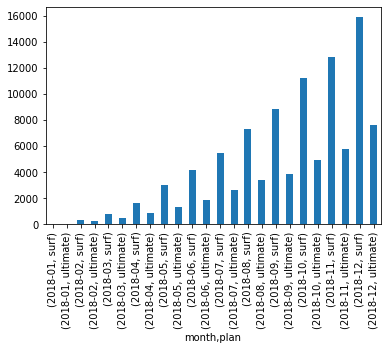

In [38]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
media_internet = df_internet.merge(df_users, on='user_id')
media_internet = media_internet.groupby(['month', 'plan'])['mb_used'].count()
print(media_internet)

media_internet.plot(kind='bar')
plt.show()





[Formule conclusões sobre como os usuários se comportam em termos de mensagens. O comportamento é diferente dependendo do plano?]
- não consegui fazer a soma por mês, sem ficar somando a cada mês

<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Valeu pelo ajuste!
</div>

### Internet

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

As dicas da sessão de ligação se aplicam também para as sessões de mensagens e internet.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

As dicas da sessão de ligação continuam se aplicando também para as sessões de mensagens e internet.
</div>

In [39]:
media_internet = df_internet.merge(df_users, on='user_id')
media_internet = media_internet.groupby(['month', 'plan'])['mb_used'].count()
print(media_internet)




month    plan    
2018-01  surf           30
         ultimate       66
2018-02  surf          308
         ultimate      296
2018-03  surf          819
         ultimate      517
2018-04  surf         1661
         ultimate      897
2018-05  surf         2988
         ultimate     1300
2018-06  surf         4153
         ultimate     1904
2018-07  surf         5501
         ultimate     2609
2018-08  surf         7336
         ultimate     3382
2018-09  surf         8832
         ultimate     3890
2018-10  surf        11226
         ultimate     4967
2018-11  surf        12837
         ultimate     5814
2018-12  surf        15895
         ultimate     7597
Name: mb_used, dtype: int64


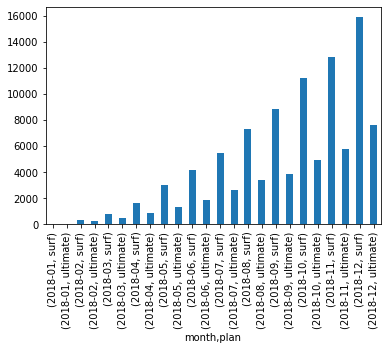

In [40]:
media_internet.plot(kind='bar')
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]
- naõ sei qual a diferença entre essa parte e a anterior

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Precisamos acertar a sua função de cálculo de receita para posteriormente trabalhar com o resultado nessa sessão.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

O tutor vai conseguir te ajudar a validar os resultados dessa sessão após os ajustes.
</div>

plan      month  
surf      2018-01    20.000000
          2018-02    34.256733
          2018-03    45.790261
          2018-04    40.454700
          2018-05    47.235155
          2018-06    48.930735
          2018-07    62.221942
          2018-08    63.572562
          2018-09    57.948540
          2018-10    65.046710
          2018-11    57.628813
          2018-12    70.102687
ultimate  2018-01    70.000000
          2018-02    70.000000
          2018-03    74.666667
          2018-04    73.000000
          2018-05    70.724138
          2018-06    71.638298
          2018-07    71.898305
          2018-08    72.859155
          2018-09    72.034884
          2018-10    72.311321
          2018-11    71.708661
          2018-12    73.291391
Name: receita, dtype: float64


[]

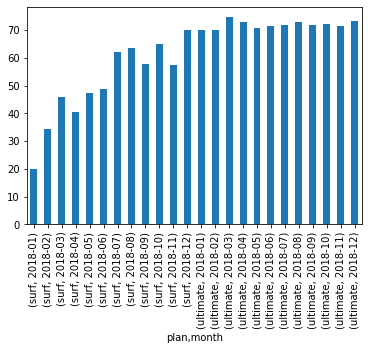

In [53]:

usuario_por_plano = merged_data.groupby(['plan', 'month'])['receita'].mean()

print(usuario_por_plano)
usuario_por_plano.plot(kind='bar')
plt.plot()



<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Devemos exibir aqui um comparativo da receita de cada um dos planos no decorrer dos meses. Sumarizações e gráficos são bem vindos.
</div>

- não sei por que a receita do ultimate está zerada

<div class="alert alert-danger">
<strong>Comentário do revisor v4</strong>

O plan deve estar presente dentro do groupby, mas não dentro da agregação.

A melhor forma de sumarizar aqui seria a média, não a soma. Assim conseguiríamos comparar a evolução tanto intra como entre planos.
</div>

- eu acho que o problema está em outro código, pois no código que eu calculo a receita_mensal, a coluna receita na parte ultimate está zeerada

[Formule conclusões sobre como a receita difere entre os planos.]
- a difereneça entre os planos é bem grande


<div class="alert alert-danger">
<strong>Comentário do revisor v5</strong>

Realmente, o problema parece estar no cálculo da receita. Esse é o último ponto restante, vou pedir para um tutor abordá-lo contigo no detalhe ok?
</div>

## Teste hipóteses estatísticas

[Teste a hipótese de que as receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [42]:
# Teste as hipóteses
alpha = 0.05
receita_surf = merged_data[merged_data['plan'] == 'surf']['receita']
receita_ultimate = merged_data[merged_data['plan'] == 'ultimate']['receita']
receita_mensal_esperada = merged_data.apply(receita_mensal, axis=1)

# Realiza o teste t de uma amostra
results = st.ttest_ind(receita_surf, receita_ultimate)

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


valor-p: 1.4897548596839156e-36
Rejeitamos a hipótese nula


<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Você deve separar duas amostras, cada uma com os usuários de um plano e essas amostras serão utilizadas no seu teste t.
</div>

- qual receita média eu devo usar?
- quais valores dentro do ttest devo usar?

<div class="alert alert-success">
<strong>Comentário do revisor v4</strong>

Está perfeito agora!
</div>

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [43]:
# Teste as hipóteses

merged_data = merged_data.merge(df_users, on='user_id')
grupo_ny_nj = merged_data[merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['receita']
grupo_outras_regioes = merged_data[merged_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['receita']

results = st.ttest_ind(grupo_ny_nj, grupo_outras_regioes)

print('Valor-p:', results.pvalue)

alfa = 0.05
if results.pvalue < alfa:
    print("Rejeitamos a hipótese nula: A receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.")
else:
    print("Não podemos rejeitar a hipótese nula: Não há evidências suficientes para concluir que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.")


Valor-p: 0.8076549151500662
Não podemos rejeitar a hipótese nula: Não há evidências suficientes para concluir que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Precisamos acertar a sua função de cálculo de receita para posteriormente trabalhar com o resultado nessa sessão.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Quando arrumarmos a função da receita com a ajuda do tutor vai ficar tudo certo.
    
O teste de hipóteses está com a direção certa. Assim que ajustarmos tudo será possível avaliarmos o resultado.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Está tudo na direção certa nesse teste. No entanto podem haver NaNs na sua amostra que fazem com que o p-valor retornado seja nulo, e isso não pode acontecer.
</div>

- eu não sei onde estão os valores NaNs
- eu tentei usar os códigos que eu conheço para preencher os valores ausentes onde eu acho que eles estão, mas sempre da errro
- estou precisando de uma orientação aqui

<div class="alert alert-danger">
<strong>Comentário do revisor v4</strong>

A razão do erro está aqui:
    
    grupo_ny_nj = merged_data[merged_data['city'] == 'NY-NJ']['receita']
    grupo_outras_regioes = merged_data[merged_data['city'] != 'NY-NJ']['receita']
    
Se consultar o conteúdo do primeiro, vai ver que stá vazio, pois nenhuma linha é exatamente igual a NY-NJ.
    
Para preencher esse primeiro df você deve pegar todas as linhas *que contenham* "NY-NJ"
    
    
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v5</strong>

tudo certinho com o teste agora!
</div>



## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]
- tive algumas dúvidas durante o projeto
- não consegui entender alguns erros
- na parte final, não sei direito que valores usar dentro do código

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Monica, tudo certo, vou pedir para um tutor entrar em contato contigo para te ajudar com esses erros mais chatinhos.
    
Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


- ainda tenho algumas dúvidas dentro do projeto
- vou enviar para ver se eu consegui acertas algumas coisas eu musdei
- semana que vem vou entrar em contato com o meu tutor e marcar uma reunião para falar mais sobre essas dúvidas
- mas vou ficar esperando para saber exatamente onde eu tenho dúvidas e onde preciso mudar

<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Monica, valeu pelos ajustes. Avançamos por aqui mas temos bastante coisa para acertar para ficarmos com um trabalho 100%.
    
O tutor vai conseeguir te dar um suporte muito bom e o resultado ficará incrível. Não desanime! Marquei com v2 instruções mais direcionadas para você abordar com o tutor.
    
Vai dar tudo certo, conte comigo e até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v3' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>



- eu ainda tenho algumas dúvidas em alguns pontos 
- eu não sei se os itens que naço tem v3, estã correto ou ainda precisa de alteração


<div class="alert alert-danger">
<strong>Comentário do revisor v4</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v4' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>



- ainda não sei como preencher a parte da receita do ultimate
- como conclusão do projeto, é possivel perceber que no primeiro teste de hipotese rejeitamos a amostra e na segunda não podemos rejeitar a a

<div class="alert alert-danger">
<strong>Comentário do revisor v5</strong>

O único ponto pendente é o do cálculo da receita. Creio que o tutor poderá entrer no detalhe contigo e ajudá-la com essa parte. Pode por favor abordar esse ponto com ele quando contactada?
    
Até breve!
</div>

- pelo projeto, é possivel perceber que quem utiliza o plano ultimate, dificilmente gasta mais do que está incluso no plano
- porém, a maioria dos usuários do plano surf gasta mais que o incluso no plano, mas não chega a gastar mais que 70 que é o valor fixo do plano ultimate
- com isso, é possivel concluir que a pessoa só deve mudar de plano surf para ultimate se o total gasto ultrapassar o valor fixo do plano ultimate
- pelos testes de hipotese, é possivel perceber que não há evidências suficientes para concluir que existe diferença entre as regiões
- mas que possivelmente existe entre os planos
- isso é possivel de se concluir, pois no primeiro teste rejeitamos a amostra e no segundo não é possivel rejeitar